In [65]:
import numpy as np
import pandas as pd

In [66]:
match=pd.read_csv("C:\\Users\\jyoti\\OneDrive\\Desktop\\ML-Projects\\IPL Win Predictor\\matches.csv")
delivery=pd.read_csv("C:\\Users\\jyoti\\OneDrive\\Desktop\\ML-Projects\\IPL Win Predictor\\deliveries.csv")

In [67]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [68]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [69]:
match.shape,delivery.shape

((756, 18), (179078, 21))

In [70]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [71]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [72]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [73]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [74]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [75]:
teams=[
        'Sunrisers Hyderabad', 
        'Mumbai Indians',
        'Royal Challengers Bangalore',
        'Kolkata Knight Riders',
        'Kings XI Punjab',
        'Chennai Super Kings',
        'Rajasthan Royals',
        'Delhi Capitals'
]

In [76]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [77]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [78]:
match_df.shape

(641, 20)

In [79]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [80]:
match_df=match_df[match_df['dl_applied']==0]

In [81]:
match_df.shape

(626, 20)

In [82]:
match_df['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [83]:
match_df=match_df[['match_id','city','winner','total_runs','venue']]

In [84]:
delivery_df=match_df.merge(delivery,on='match_id')
delivery_df

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,2,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,3,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,4,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,5,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [85]:
delivery_df['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Wankhede Stadium',
       'Holkar Cricket Stadium', 'Eden Gardens', 'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cri

In [86]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [87]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8488\2360476087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [88]:
delivery_df

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,2,...,0,0,0,1,0,1,NaN,NaN,NaN,152
149574,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,3,...,0,0,0,2,0,2,NaN,NaN,NaN,154
149575,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,4,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
149576,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,5,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [89]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']+1

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8488\882698731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']+1


In [90]:
delivery_df

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,0,4,0,4,NaN,NaN,NaN,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,2,...,0,0,1,0,1,NaN,NaN,NaN,152,1
149574,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,3,...,0,0,2,0,2,NaN,NaN,NaN,154,-1
149575,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,4,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
149576,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,5,...,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [91]:
delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8488\2918661865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left']=126-(delivery_df['over']*6+delivery_df['ball'])


In [92]:
delivery_df

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,2,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,3,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,4,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,5,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [93]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 0 if x == 0 else 1).astype(int)

wickets=delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets']=10-wickets

delivery_df.head(10)

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8488\3560761491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna(0)
C:\Users\jyoti\AppData\Local\Temp\ipykernel_8488\3560761491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 0 if x == 0 else 1).astype(int)
C:\Users\jyoti\AppData\Local\Temp\ipykernel_8488\3560761491.py:5: SettingWithCopyWarning: 
A value

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,4,0,4,0,NaN,NaN,7,201,115,10
130,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,...,4,0,4,0,NaN,NaN,11,197,114,10
131,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,...,0,0,0,0,NaN,NaN,11,197,113,10
132,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,...,0,0,0,0,NaN,NaN,11,197,112,10
133,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,...,1,0,1,0,NaN,NaN,12,196,111,10
134,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,...,0,0,0,0,NaN,NaN,12,196,110,10


In [94]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,2,...,1,0,1,0,NaN,NaN,152,1,4,5
149574,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,3,...,2,0,2,0,NaN,NaN,154,-1,3,5
149575,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,4,...,1,0,1,1,run out,KH Pandya,155,-2,2,4
149576,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,5,...,2,0,2,0,NaN,NaN,157,-4,1,4
149577,11415,Hyderabad,Mumbai Indians,152,Rajiv Gandhi Intl. Cricket Stadium,2,Chennai Super Kings,Mumbai Indians,20,6,...,0,0,0,1,lbw,NaN,157,-4,0,3


In [95]:
# CRR= Runs/Overs
delivery_df['crr']=delivery_df['current_score']*6/(120-delivery_df['balls_left'])

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8488\1946083059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr']=delivery_df['current_score']*6/(120-delivery_df['balls_left'])


In [96]:
delivery_df.head(15)

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,0,1,0,NaN,NaN,1,207,119,10,6.000000
126,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,0,NaN,NaN,1,207,118,10,3.000000
127,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,0,NaN,NaN,1,207,117,10,2.000000
128,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,0,2,0,NaN,NaN,3,205,116,10,4.500000
129,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,0,4,0,NaN,NaN,7,201,115,10,8.400000
130,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,...,0,4,0,NaN,NaN,11,197,114,10,11.000000
131,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,...,0,0,0,NaN,NaN,11,197,113,10,9.428571
132,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,...,0,0,0,NaN,NaN,11,197,112,10,8.250000
133,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,...,0,1,0,NaN,NaN,12,196,111,10,8.000000
134,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,...,0,0,0,NaN,NaN,12,196,110,10,7.200000


In [97]:
delivery_df['rrr']=(delivery_df['runs_left']*6/delivery_df['balls_left'])

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8488\2988702141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr']=(delivery_df['runs_left']*6/delivery_df['balls_left'])


In [98]:
delivery_df.head(15)

,match_id,city,winner,total_runs_x,venue,inning,batting_team,bowling_team,over,ball,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,...,1,0,NaN,NaN,1,207,119,10,6.000000,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,...,0,0,NaN,NaN,1,207,118,10,3.000000,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,...,0,0,NaN,NaN,1,207,117,10,2.000000,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,...,2,0,NaN,NaN,3,205,116,10,4.500000,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,...,4,0,NaN,NaN,7,201,115,10,8.400000,10.486957
130,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,...,4,0,NaN,NaN,11,197,114,10,11.000000,10.368421
131,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,...,0,0,NaN,NaN,11,197,113,10,9.428571,10.460177
132,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,...,0,0,NaN,NaN,11,197,112,10,8.250000,10.553571
133,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,...,1,0,NaN,NaN,12,196,111,10,8.000000,10.594595
134,1,Hyderabad,Sunrisers Hyderabad,207,"Rajiv Gandhi International Stadium, Uppal",2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,...,0,0,NaN,NaN,12,196,110,10,7.200000,10.690909


In [99]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [100]:
delivery_df['result']=delivery_df.apply(result,axis=1)

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8488\2671046774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result']=delivery_df.apply(result,axis=1)


In [101]:
final_df=delivery_df[['batting_team','bowling_team','city','venue','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
final_df

,batting_team,bowling_team,city,venue,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",207,119,10,207,6.000000,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",207,118,10,207,3.000000,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",207,117,10,207,2.000000,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",205,116,10,207,4.500000,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",201,115,10,207,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,Rajiv Gandhi Intl. Cricket Stadium,1,4,5,152,7.862069,1.500000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,Rajiv Gandhi Intl. Cricket Stadium,-1,3,5,152,7.897436,-2.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,Rajiv Gandhi Intl. Cricket Stadium,-2,2,4,152,7.881356,-6.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,Rajiv Gandhi Intl. Cricket Stadium,-4,1,4,152,7.915966,-24.000000,0


In [102]:
final_df=final_df.sample(final_df.shape[0])

In [103]:
final_df.dropna(inplace=True)

In [104]:
final_df=final_df[final_df['balls_left']!=0]

## Model Building

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X=final_df.drop('result',axis=1)
y=final_df['result']

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'),
     ['batting_team', 'bowling_team', 'city','venue'])
], remainder='passthrough')


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [110]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])
# pipe=Pipeline(steps=[
#     ('step1',trf),
#     ('step2',RandomForestClassifier())
# ])

In [111]:
pipe

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [112]:
pipe.fit(X_train,y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [113]:
y_pred=pipe.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8029294274300932

In [115]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','venue','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [116]:
temp_df,target = match_progression(delivery_df,84,pipe)
temp_df

Target- 126


,end_of_over,runs_after_over,wickets_in_over,lose,win
12856,1,5,0,3.9,96.1
12862,2,7,1,6.3,93.7
12871,3,9,0,4.9,95.1
12878,4,10,0,3.6,96.4
12884,5,12,0,2.3,97.7
12890,6,8,0,1.9,98.1
12896,7,3,0,2.2,97.8
12902,8,8,0,1.8,98.2
12908,9,4,1,3.6,96.4
12914,10,14,0,2.0,98.0


Text(0.5, 1.0, 'Target-126')

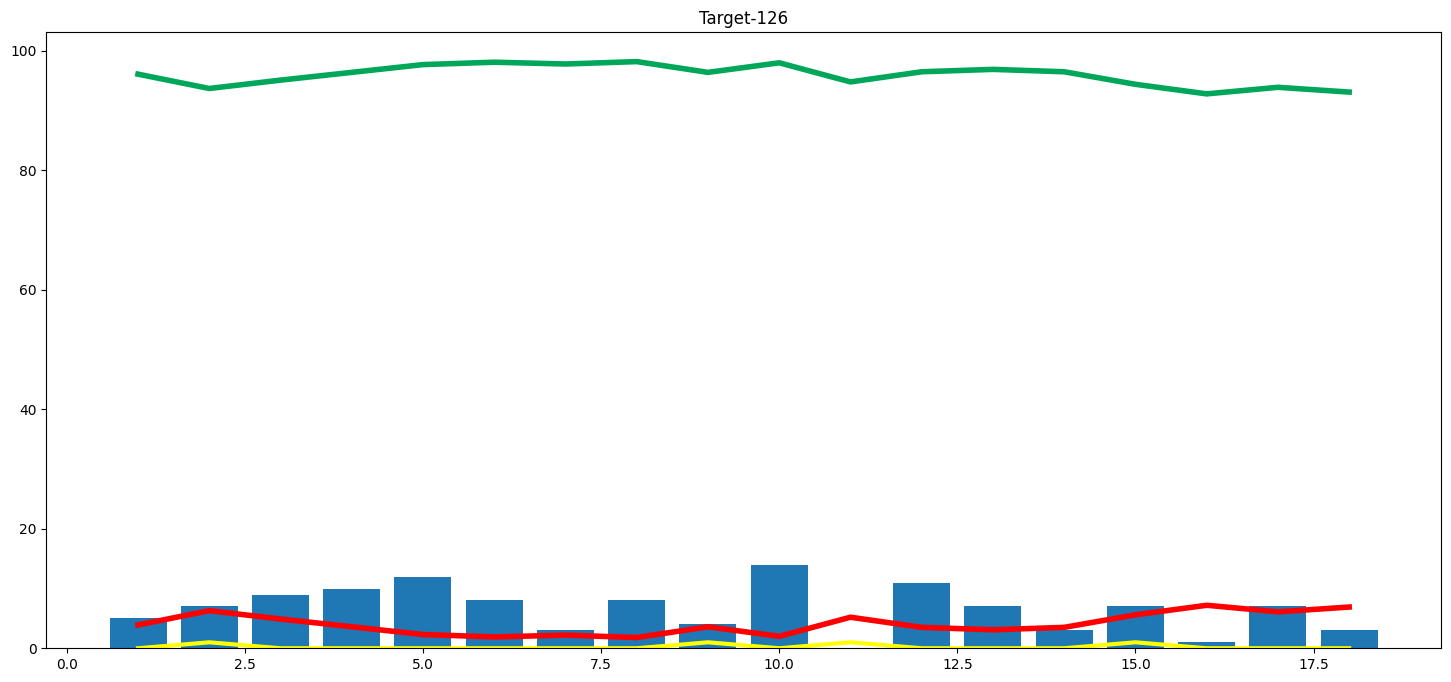

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

### CampusX part done 

## Testing PlayGround

In [118]:
X_train

,batting_team,bowling_team,city,venue,runs_left,balls_left,wickets,total_runs_x,crr,rrr
37638,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,M Chinnaswamy Stadium,98,46,6,171,6.000000,12.782609
90350,Delhi Daredevils,Mumbai Indians,Sharjah,Sharjah Cricket Stadium,6,10,6,125,6.545455,3.600000
134928,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,Eden Gardens,110,79,9,179,10.243902,8.354430
44911,Chennai Super Kings,Kolkata Knight Riders,Chennai,"MA Chidambaram Stadium, Chepauk",106,101,9,139,10.736842,6.297030
48214,Rajasthan Royals,Deccan Chargers,Hyderabad,"Rajiv Gandhi International Stadium, Uppal",109,93,10,137,6.444444,7.032258
...,...,...,...,...,...,...,...,...,...,...
124580,Royal Challengers Bangalore,Mumbai Indians,Mumbai,Wankhede Stadium,124,39,6,230,7.925926,19.076923
80501,Kings XI Punjab,Chennai Super Kings,Chennai,"MA Chidambaram Stadium, Chepauk",41,17,7,186,8.504854,14.470588
105775,Mumbai Indians,Delhi Daredevils,Delhi,Feroz Shah Kotla,179,107,10,190,5.538462,10.037383
56409,Royal Challengers Bangalore,Kings XI Punjab,Dharamsala,Himachal Pradesh Cricket Association Stadium,186,77,6,232,6.558140,14.493506


In [119]:
import tensorflow as tf

In [120]:
# 1️⃣ Apply the transformer on X
X_transformed = trf.fit_transform(X)

# 2️⃣ Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# 3️⃣ Convert to float (TensorFlow expects numeric dtype)
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# 4️⃣ Build your model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=(X_train.shape[1],), activation='sigmoid'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)  # or activation='sigmoid' if classification
])

# 5️⃣ Compile
model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])  # for regression
# or use loss='binary_crossentropy', metrics=['accuracy'] for classification

# 6️⃣ Train
model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))


Epoch 1/10


c:\Users\jyoti\OneDrive\Desktop\ML-Projects\IPL Win Predictor\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1784/1784 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.7735 - loss: 0.2741 - val_accuracy: 0.7961 - val_loss: 0.2345
Epoch 2/10
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.8019 - loss: 0.2282 - val_accuracy: 0.8066 - val_loss: 0.2188
Epoch 3/10
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.8066 - loss: 0.2196 - val_accuracy: 0.8094 - val_loss: 0.2089
Epoch 4/10
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - accuracy: 0.8092 - loss: 0.2131 - val_accuracy: 0.8123 - val_loss: 0.2105
Epoch 5/10
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - accuracy: 0.8129 - loss: 0.2075 - val_accuracy: 0.8115 - val_loss: 0.2036
Epoch 6/10
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.8149 - loss: 0.2027 - val_accuracy: 0.8157 - val_loss: 0.2110
Epoch 7/10
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.8191 - loss: 0.1995 - val_accuracy: 0.8175 - val_loss: 0.2031
Epoch 8/10
1784/1784 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.8237 - loss: 0.19

In [121]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [122]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [123]:
delivery_df['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Wankhede Stadium',
       'Holkar Cricket Stadium', 'Eden Gardens', 'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cri

In [124]:
delivery_df['venue']=delivery_df['venue'].replace("Rajiv Gandhi International Stadium, Uppal","Rajiv Gandhi Intl. Cricket Stadium")

C:\Users\jyoti\AppData\Local\Temp\ipykernel_8488\2618402351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['venue']=delivery_df['venue'].replace("Rajiv Gandhi International Stadium, Uppal","Rajiv Gandhi Intl. Cricket Stadium")


In [125]:
pipe

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('trf', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [127]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))